#### 决策树算法的核心是要解决两个问题
#### 1）如何从数据表中找到最佳结点和最佳分支
#### 2）如何让决策树停止生长，防止过拟合

#### sklearn中决策树的类都在tree这个模块之下 这个模块总共包含五个类
#### tree.DecisionTreeClassifier  分类树
#### tree.DecisionTreeRegressor  回归树
#### tree.export_graphviz  将生成的决策树导出为DOT格式，画图专用
#### tree.ExtraTreeClassifier  高随机版本的分类树
#### tree.ExtraTreeRegressor  高随机版本的回归树

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()  #实例化
clf = clf.fit(x_train,y_train)
result = clf.score(x_test,y_test)  #导入测试集 从接口中调用需要的信息

#### class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

In [1]:
'''重要参数：
criterion: gini或entropy 通常就使用基尼系数数据维度很大，噪音很大时使用基尼系数维度低，数据比较清晰的时候，
            信息熵和基尼系数没区别当决策树的拟合程度不够的时候，使用信息熵两个都试试，不好就换另一个
'''

'重要参数：\ncriterion: gini或entropy 通常就使用基尼系数数据维度很大，噪音很大时使用基尼系数维度低，数据比较清晰的时候，\n            信息熵和基尼系数没区别当决策树的拟合程度不够的时候，使用信息熵两个都试试，不好就换另一个\n'

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine  #红酒数据
from sklearn.model_selection import train_test_split 

In [2]:
wine = load_wine()  #数据实例化

In [3]:
wine.data.shape #字典类型  shape数据结构

(178, 13)

In [29]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
import pandas as pd  #将其转化为DataFrame格式
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0


In [13]:
wine.feature_names #特征名字

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [14]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size = 0.3) #随机划分30%做测试集

In [16]:
Xtrain.shape

(124, 13)

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy')  #实例化
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest) #返回预测的准确度accuracy

In [12]:
score

0.8888888888888888

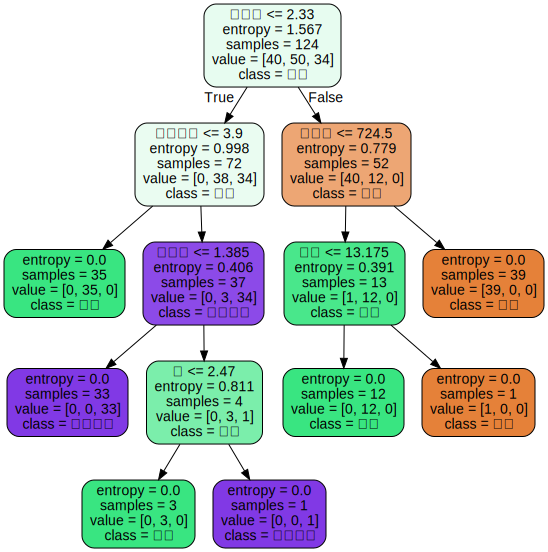

In [13]:
feature_name = ['酒精','苹果酸','灰'   ,'灰的碱性','镁'   ,
                '总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz  #画决策树的模块
dot_data = tree.export_graphviz(clf,feature_names=feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True #填充颜色
                                ,rounded=True #框的形状
                               )
graph = graphviz.Source(dot_data) #图像导出
graph

In [8]:
clf.feature_importances_  #特征的重要性

array([0.        , 0.        , 0.        , 0.        , 0.02238535,
       0.        , 0.21583416, 0.        , 0.        , 0.2806197 ,
       0.02499136, 0.        , 0.45616943])

In [9]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.022385348102802467),
 ('总酚', 0.0),
 ('类黄酮', 0.2158341591689255),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.28061970094381355),
 ('色调', 0.02499136408687705),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.4561694276975814)]

#### 剪枝参数
##### max_depth 限制树的最大深度，超过设定深度的树枝全部剪掉这是用得最广泛的剪枝参数，在高维度低样本量时非常有效，通常从=3开始尝试
##### min_samples_leaf&min_samples_split 
##### min_samples_leaf限定，一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生。一般来说，建议从=5开始使用。如果叶节点中含有的样本量变化很大，建议输入浮点数作为样本量的百分比来使用。同时，这个参数可以保证每个叶子的最小尺寸，可以在回归问题中避免低方差，过拟合的叶子节点出现。对于类别不多的分类问题，=1通常就是最佳选择
##### min_samples_split限定，一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生。       
##### max_features & min_impurity_decrease
##### max_features限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃。
##### min_impurity_decrease限制信息增益的大小，信息增益小于设定数值的分枝不会发生。

In [35]:
import os
os.environ['PATH']

'C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files (x86)\\Intel\\iCLS Client\\;C:\\Program Files\\Intel\\iCLS Client\\;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;D:\\javajdk\\bin;D:\\Anaconda\\Scripts;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\Program Files\\dotnet\\;C:\\Program Files (x86)\\Microsoft SQL Server\\110\\Tools\\Binn\\ManagementStudio\\;C:\\Program Files (x86)\\Microsoft SQL Server\\110\\DTS\\Binn\\;C:\\WINDOWS\\System32\\OpenSSH\\;D:\\node.js\\;D:\\Rose\\common;C:\

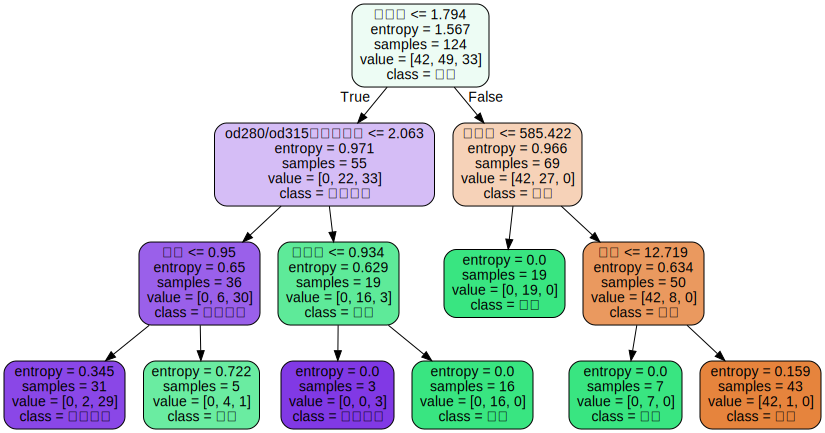

In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=3
                                 # ,min_samples_leaf=10
                                 #,min_samples_split=25
                                  )
clf = clf.fit(Xtrain,Ytrain)
dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph                        

### 学习曲线

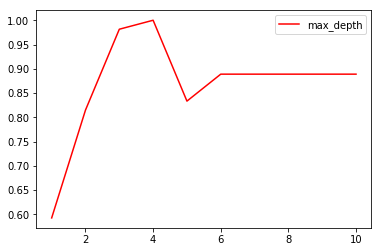

In [21]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     ,criterion='entropy'
                                     ,random_state=30
                                     ,splitter='random'
                                     )
    clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)
    test.append(score)
plt.plot(range(1,11),test,color = 'red',label = 'max_depth')
plt.legend()
plt.show()

##### class_weight&min_weight_fraction_leaf   目标权重参数
##### 完成样本标签平衡的参数。样本不平衡是指在一组数据集中，标签的一类天生占有很大的比例。比如说，在银行要判断“一个办了信用卡的人是否会违约”，就是是vs否（1%：99%）的比例。这种分类状况下，即便模型什么也不做，全把结果预测成“否”，正确率也能有99%。因此我们要使用class_weight参数对样本标签进行一定的均衡，给少量的标签更多的权重，让模型更偏向少数类，向捕获少数类的方向建模。该参数默认None，此模式表示自动给与数据集中的所有标签相同的权重。
##### 有了权重之后，样本量就不再是单纯地记录数目，而是受输入的权重影响了，因此这时候剪枝，就需要搭配min_weight_fraction_leaf这个基于权重的剪枝参数来使用。另请注意，基于权重的剪枝参数（例如min_weight_fraction_leaf）将比不知道样本权重的标准（比如min_samples_leaf）更少偏向主导类。如果样本是加权的，则使用基于权重的预修剪标准来更容易优化树结构，这确保叶节点至少包含样本权重的总和的一小部分。



In [14]:
clf.classes_ # 输出一个数组 输出所有的标签

array([0, 1, 2])

In [15]:
clf.feature_importances_ #返回每个特征的重要性，一般是这个特征在多次分支中产生的信息增益的综合，也被称为
#基尼重要性

array([0.02618002, 0.        , 0.01670356, 0.        , 0.        ,
       0.        , 0.48223443, 0.        , 0.        , 0.29246161,
       0.        , 0.        , 0.18242038])

In [16]:
clf.max_features_ #参数max_features的推断值

13

In [17]:
clf.n_classes_ #标签类别的数据

3

In [18]:
clf.n_features_ # 在训练模型时使用的特征个数

13

In [19]:
clf.n_outputs_ # 在训练模型时输出的结果的个数

1

##### 决策树常用的接口

In [20]:
# apply 返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([ 2, 12, 12,  2,  2, 10, 10,  2,  6,  2, 12,  4,  6,  4, 10, 12, 12,
        4,  2,  4, 12,  2, 12, 12,  4, 12,  2, 12,  6,  4,  4, 12, 10, 12,
        6, 12, 12,  4,  4, 10,  4, 11, 12,  2, 12, 12,  2,  4, 12,  2,  4,
        2,  2,  2], dtype=int64)

In [21]:
# predict返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1,
       0, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1,
       0, 0, 1, 2, 0, 1, 2, 1, 1, 1])

# 回归树参数、属性、接口

##### classsklearn.tree.DecisionTreeRegressor(criterion=’mse’, splitter=’best’, max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)

In [22]:
'''
重要参数：
criterion:输入"mse"使用均方误差mean squared error(MSE)
          输入“friedman_mse”使用费尔德曼均方误差
          输入"mae"使用绝对平均误差MAE(mean absolute error)
          注意：回归树的接口score返回的是R平方，并不是MSE
'''

'\n重要参数：'

In [25]:
'''交叉验证：我们将数据划分为n份，依次使用其中一份作为测试集，其他n-1份作为训练集，多次计算模型的精确性来
评估模型的平均准确程度。训练集和测试集的划分会干扰模型的结果，因此用交叉验证n次的结果求出的平均值，是对模
型效果的一个更好的度量。
'''
from sklearn.datasets import load_boston #波士顿房价数据
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor,boston.data,boston.target,cv=10,
                scoring='neg_mean_squared_error' #负的均方误差
               ) #十交叉验证
#交叉验证cross_val_score的用法

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])